In [ ]:
#Proyecto 7, modelado de tree classifier para obtener una perspectiva grupal de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%run /content/drive/MyDrive/Ucamp/Functions.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Ucamp/Modulo7/Your Career Aspirations of GenZ.csv')

In [ ]:
#Eliminamos la columna "Your Current Zip Code / Pin Code" ya que no aporta informacion relevante al igual que "Your current country" ya que el 98% de las respuestas son India
df = df.drop("Your Current Zip Code / Pin Code", axis = True)

In [ ]:
#Pero al tener un comun denominador cada respuesta las reduje a 2
df["Which of the below Employers would you work with."] = df["Which of the below Employers would you work with."].replace("Employer who rewards learning and enables that environment", "Empresa que promueve y recompensa el aprendizaje")
df["Which of the below Employers would you work with."] = df["Which of the below Employers would you work with."].replace('Employer who pushes your limits by enabling an learning environment, and rewards you at the end', "Empresa que promueve y recompensa el aprendizaje")
df["Which of the below Employers would you work with."] = df["Which of the below Employers would you work with."].replace('Employer who appreciates learning and enables that environment', "Empresa que promueve y recompensa el aprendizaje")
df["Which of the below Employers would you work with."] = df["Which of the below Employers would you work with."].replace("Employer who pushes your limits and doesn't enables learning environment and never rewards you", "Empresa con menor enfoque en el aprendizaje")
df["Which of the below Employers would you work with."] = df["Which of the below Employers would you work with."].replace("Employers who appreciates learning but doesn't enables an learning environment", "Empresa con menor enfoque en el aprendizaje")

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder.fit_transform(list(df[col].values))
        df[col] = label_encoder.transform(df[col].values)

In [ ]:
#Aca generamos la transformacion PCA, luego calculamos la va
pca = PCA(n_components=2)
df1 = pca.fit_transform(df)
exp_var_pca = pca.explained_variance_ratio_
print(f"Cada columna tiene el siguiente porcentaje de explicacion respectivamente:{exp_var_pca}")
radios = np.linalg.norm(df1, axis=1)

for i, radio in enumerate(radios):
    print(f"Dato numero {i + 1} transformado: {radio}")

Cada columna tiene el siguiente porcentaje de explicacion respectivamente:[0.93860953 0.06139047]
Dato numero 1 transformado: 30.630638809111268
Dato numero 2 transformado: 31.131170420126807
Dato numero 3 transformado: 22.0084126513259
Dato numero 4 transformado: 22.12755805547765
Dato numero 5 transformado: 33.97218794442108
Dato numero 6 transformado: 22.132743978401606
Dato numero 7 transformado: 11.434639018324829
Dato numero 8 transformado: 23.02723166580741
Dato numero 9 transformado: 40.06083692933813
Dato numero 10 transformado: 23.51245834277042
Dato numero 11 transformado: 26.258110282817505
Dato numero 12 transformado: 17.258512824894655
Dato numero 13 transformado: 10.192643300062683
Dato numero 14 transformado: 11.352546975496136
Dato numero 15 transformado: 8.790364784456818
Dato numero 16 transformado: 30.212696262303194
Dato numero 17 transformado: 8.068847068137131
Dato numero 18 transformado: 14.33841131753287
Dato numero 19 transformado: 21.87894951609943
Dato numer

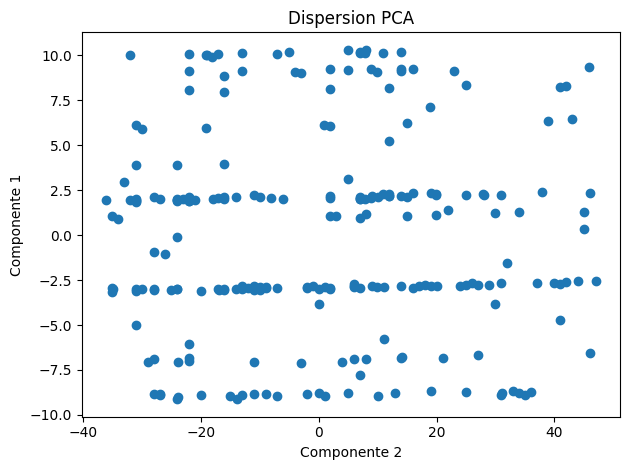

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1_feature1 = df[:,0]
df1_feature2 = df[:,1]
plt.scatter(df1_feature1, df1_feature2)
plt.title("Dispersion PCA")
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')
plt.tight_layout()
plt.show()

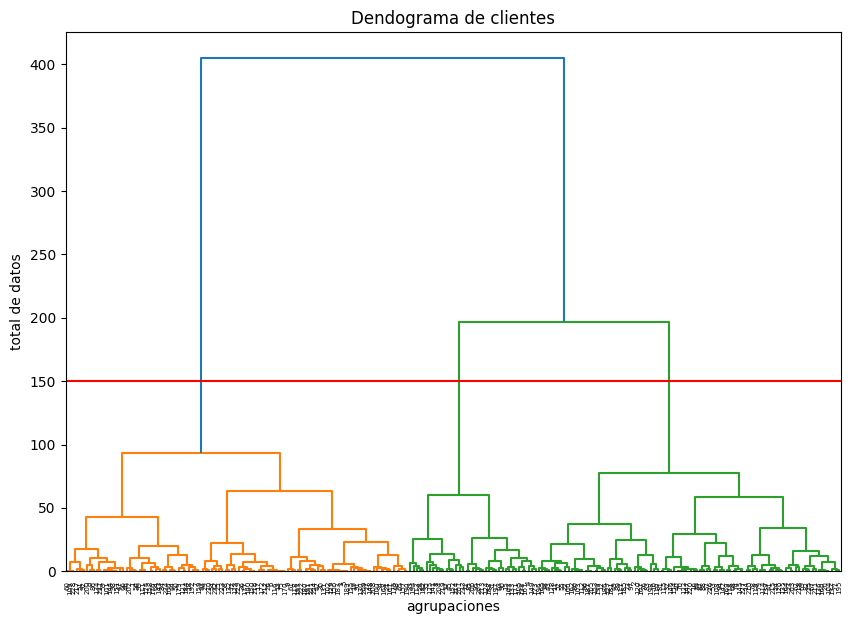

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel('total de datos')
plt.xlabel('agrupaciones')
clusters = shc.linkage(df1,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 150, color = 'r', linestyle = '-')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#3 grupos; silueta = 0.536, Calinski-Harabasz = 572.627, Davies-Bouldin = 0.612, mejor calinski y silueta
for i in range(2,21):
  hc = AgglomerativeClustering(n_clusters = i, affinity = "euclidean", linkage = "ward")
  labels = hc.fit_predict(df1)
  Silueta = metrics.silhouette_score(df, labels)
  Calinski_Harabasz = metrics.calinski_harabasz_score(df, labels)
  Davies_Bouldin = metrics.davies_bouldin_score(df, labels)
  Silueta = round(Silueta, 3)
  Calinski_Harabasz = round(Calinski_Harabasz, 3)
  Davies_Bouldin = round(Davies_Bouldin, 3)
  print(f'{i} grupos; silueta = {Silueta}, Calinski-Harabasz = {Calinski_Harabasz}, Davies-Bouldin = {Davies_Bouldin}')

2 grupos; silueta = 0.56, Calinski-Harabasz = 478.703, Davies-Bouldin = 0.594
3 grupos; silueta = 0.536, Calinski-Harabasz = 572.627, Davies-Bouldin = 0.612
4 grupos; silueta = 0.428, Calinski-Harabasz = 503.752, Davies-Bouldin = 0.795
5 grupos; silueta = 0.351, Calinski-Harabasz = 474.134, Davies-Bouldin = 0.975
6 grupos; silueta = 0.351, Calinski-Harabasz = 454.15, Davies-Bouldin = 0.943
7 grupos; silueta = 0.346, Calinski-Harabasz = 456.248, Davies-Bouldin = 0.926
8 grupos; silueta = 0.372, Calinski-Harabasz = 482.552, Davies-Bouldin = 0.881
9 grupos; silueta = 0.381, Calinski-Harabasz = 482.331, Davies-Bouldin = 0.829
10 grupos; silueta = 0.369, Calinski-Harabasz = 477.956, Davies-Bouldin = 0.883
11 grupos; silueta = 0.374, Calinski-Harabasz = 475.2, Davies-Bouldin = 0.849
12 grupos; silueta = 0.382, Calinski-Harabasz = 481.231, Davies-Bouldin = 0.85
13 grupos; silueta = 0.39, Calinski-Harabasz = 482.296, Davies-Bouldin = 0.833
14 grupos; silueta = 0.389, Calinski-Harabasz = 480.61

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


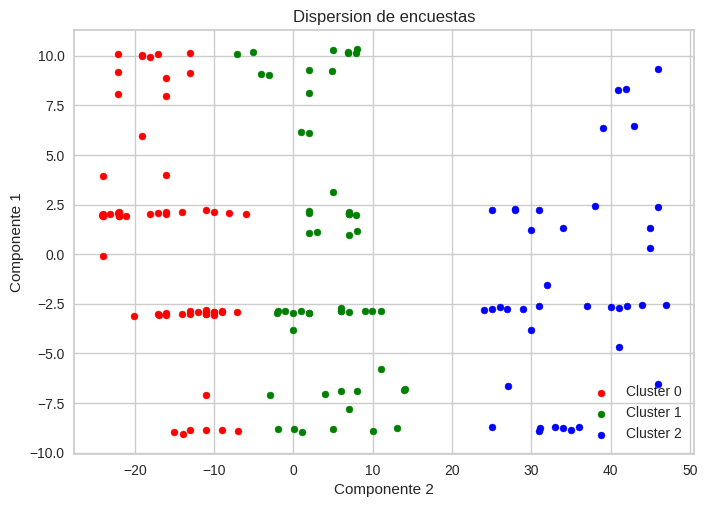

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(df1)

plt.scatter(df1[y_hc == 0, 0], df1[y_hc == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df1[y_hc == 1, 0], df1[y_hc == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df1[y_hc == 2, 0], df1[y_hc == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.title("Dispersion de encuestas")
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')



plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

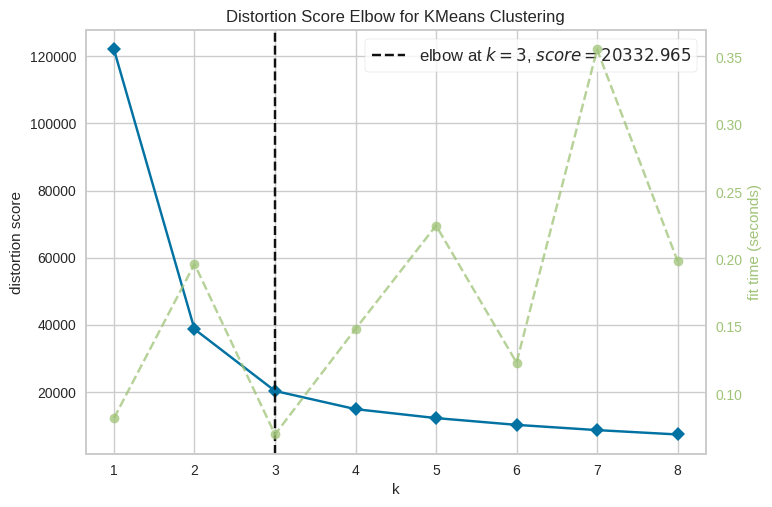

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Metodo del codo para kmean
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 9))

visualizer.fit(df)

visualizer.show()